Question 4:

Is there a correlation between certain types of offences (e.g. do areas with high drug-related crimes also see increased violent crimes)?

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read in datasets from mci_no_duplicates_2014_and_over.csv
df = pd.read_csv(Path('../Resources/mci_no_duplicates_2014_and_over.csv'))

# Create a data frame with only the columns we need HOOD_158, OCC_YEAR, LOCATION_TYPE, PREMISES_TYPE, OFFENCE, MCI_CATEGORY
df = df[['NEIGHBOURHOOD_158', 'OCC_YEAR', 'LOCATION_TYPE', 'PREMISES_TYPE', 'OFFENCE', 'MCI_CATEGORY']]

# Drop all rows with NaN values
df = df.dropna()

# Print the first 5 rows of the data frame
df.head()

,NEIGHBOURHOOD_158,OCC_YEAR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY
0,South Riverdale,2014.0,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,B&E,Break and Enter
1,North St.James Town,2014.0,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault
2,NSA,2014.0,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Over,Theft Over
3,Blake-Jones,2014.0,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault
4,Wellington Place,2014.0,Bar / Restaurant,Commercial,Assault Bodily Harm,Assault


In [3]:
# Drop all rows with NaN values
df = df.dropna()

In [4]:
# Calculate the number of unique values in the offence column
print(f"Total number of offence types are {len(df['OFFENCE'].unique())}")
print(f"Total number of MCI Categories are {len(df['MCI_CATEGORY'].unique())}")

Total number of offence types are 51
Total number of MCI Categories are 5


In [5]:
# show the offence types most common
df['OFFENCE'].value_counts()

Assault                           109634
B&E                                52616
Theft Of Motor Vehicle             41948
Assault With Weapon                25702
B&E W'Intent                        7659
Robbery - Mugging                   7567
Assault Bodily Harm                 6957
Theft Over                          5869
Robbery - Other                     4558
Assault Peace Officer               4340
Robbery With Weapon                 4205
Robbery - Business                  3857
Assault - Resist/ Prevent Seiz      2664
Theft From Motor Vehicle Over       2620
Aggravated Assault                  2332
Unlawfully In Dwelling-House        1926
Robbery - Swarming                  1905
Discharge Firearm With Intent       1696
Discharge Firearm - Recklessly      1367
Theft From Mail / Bag / Key         1293
Pointing A Firearm                  1065
Robbery - Purse Snatch              1000
Robbery - Financial Institute        838
Robbery - Vehicle Jacking            802
Robbery - Home I

In [6]:
# show the MCI categories with most crimes
df['MCI_CATEGORY'].value_counts()

Assault            157442
Break and Enter     62330
Auto Theft          41948
Robbery             26143
Theft Over          10609
Name: MCI_CATEGORY, dtype: int64

In [7]:
# Calculate the number of offences for each Neighbourhood (keep neighbourhood names)
df['NEIGHBOURHOOD_158'].value_counts()
# Create a data frame and sort the number of crimes in descending order
df_neighbourhood = pd.DataFrame(df['NEIGHBOURHOOD_158'].value_counts()).reset_index()
df_neighbourhood.columns = ['Neighbourhood', 'Number of Crimes']
# Get top 10 neighbourhoods with most crimes into new data frame
df_neighbourhood_top_10 = df_neighbourhood.head(10)
df_neighbourhood_top_10



,Neighbourhood,Number of Crimes
0,West Humber-Clairville,8053
1,Moss Park,7320
2,Downtown Yonge East,6263
3,Yonge-Bay Corridor,5840
4,York University Heights,5746
5,Wellington Place,5669
6,Kensington-Chinatown,5333
7,NSA,4786
8,West Hill,4648
9,Annex,4391


In [8]:
# Add each MCI_CATEGORY as a column to the data frame
df_neighbourhood_top_10['Assault'] = ''
df_neighbourhood_top_10['Auto Theft'] = ''
df_neighbourhood_top_10['Break and Enter'] = ''
df_neighbourhood_top_10['Robbery'] = ''
df_neighbourhood_top_10['Theft Over'] = ''
# Calculate the number of crimes for each MCI_CATEGORY and add to the data frame
for index, row in df_neighbourhood_top_10.iterrows():
    df_neighbourhood_top_10.loc[index, 'Assault'] = df[(df['NEIGHBOURHOOD_158'] == row['Neighbourhood']) & (df['MCI_CATEGORY'] == 'Assault')]['MCI_CATEGORY'].count()
    df_neighbourhood_top_10.loc[index, 'Auto Theft'] = df[(df['NEIGHBOURHOOD_158'] == row['Neighbourhood']) & (df['MCI_CATEGORY'] == 'Auto Theft')]['MCI_CATEGORY'].count()
    df_neighbourhood_top_10.loc[index, 'Break and Enter'] = df[(df['NEIGHBOURHOOD_158'] == row['Neighbourhood']) & (df['MCI_CATEGORY'] == 'Break and Enter')]['MCI_CATEGORY'].count()
    df_neighbourhood_top_10.loc[index, 'Robbery'] = df[(df['NEIGHBOURHOOD_158'] == row['Neighbourhood']) & (df['MCI_CATEGORY'] == 'Robbery')]['MCI_CATEGORY'].count()
    df_neighbourhood_top_10.loc[index, 'Theft Over'] = df[(df['NEIGHBOURHOOD_158'] == row['Neighbourhood']) & (df['MCI_CATEGORY'] == 'Theft Over')]['MCI_CATEGORY'].count()
# Print the data frame
df_neighbourhood_top_10



/var/folders/sr/dhgj0pd556lbz6w83rl0mc7c0000gn/T/ipykernel_26186/2231483911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neighbourhood_top_10['Assault'] = ''
/var/folders/sr/dhgj0pd556lbz6w83rl0mc7c0000gn/T/ipykernel_26186/2231483911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neighbourhood_top_10['Auto Theft'] = ''
/var/folders/sr/dhgj0pd556lbz6w83rl0mc7c0000gn/T/ipykernel_26186/2231483911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,Neighbourhood,Number of Crimes,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,West Humber-Clairville,8053,2311,3466,1170,625,481
1,Moss Park,7320,4468,303,1366,1023,160
2,Downtown Yonge East,6263,3882,268,1090,830,193
3,Yonge-Bay Corridor,5840,3840,175,966,516,343
4,York University Heights,5746,2741,1103,1031,518,353
5,Wellington Place,5669,3641,301,1183,349,195
6,Kensington-Chinatown,5333,3102,265,1271,463,232
7,NSA,4786,2803,484,496,797,206
8,West Hill,4648,3133,321,666,464,64
9,Annex,4391,2156,249,1386,328,272


In [9]:
# Remove "number of crimes" column
df_neighbourhood_top_10 = df_neighbourhood_top_10.drop(columns=['Number of Crimes'])
#df_neighbourhood_top_10 = df_neighbourhood_top_10.rename(columns={'Number of Crimes': 'Total'})
# Calculate the percentage of each MCI_CATEGORY and add to the data frame
#df_neighbourhood_top_10['Assault %'] = df_neighbourhood_top_10['Assault'] / df_neighbourhood_top_10['Total'] * 100
#df_neighbourhood_top_10['Auto Theft %'] = df_neighbourhood_top_10['Auto Theft'] / df_neighbourhood_top_10['Total'] * 100
#df_neighbourhood_top_10['Break and Enter %'] = df_neighbourhood_top_10['Break and Enter'] / df_neighbourhood_top_10['Total'] * 100
#df_neighbourhood_top_10['Robbery %'] = df_neighbourhood_top_10['Robbery'] / df_neighbourhood_top_10['Total'] * 100
#df_neighbourhood_top_10['Theft Over %'] = df_neighbourhood_top_10['Theft Over'] / df_neighbourhood_top_10['Total'] * 100
# Print the data frame
df_neighbourhood_top_10

,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,West Humber-Clairville,2311,3466,1170,625,481
1,Moss Park,4468,303,1366,1023,160
2,Downtown Yonge East,3882,268,1090,830,193
3,Yonge-Bay Corridor,3840,175,966,516,343
4,York University Heights,2741,1103,1031,518,353
5,Wellington Place,3641,301,1183,349,195
6,Kensington-Chinatown,3102,265,1271,463,232
7,NSA,2803,484,496,797,206
8,West Hill,3133,321,666,464,64
9,Annex,2156,249,1386,328,272


/var/folders/sr/dhgj0pd556lbz6w83rl0mc7c0000gn/T/ipykernel_26186/850006415.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_neighbourhood_top_10.corr()


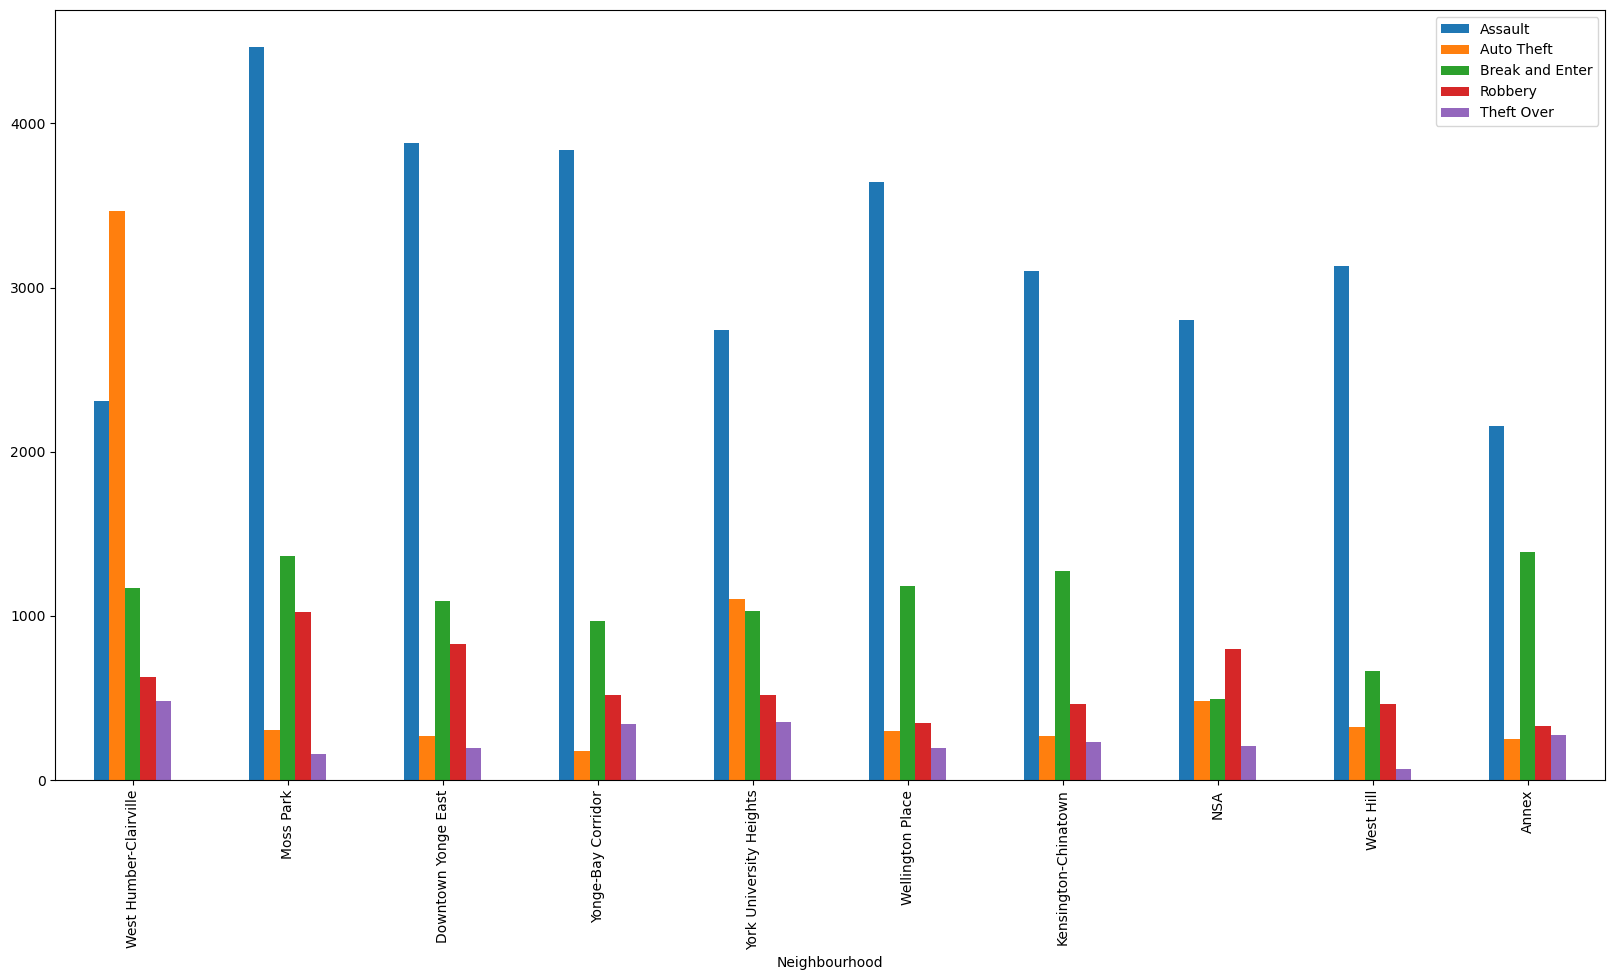

In [32]:
# Correlation between the number of crimes and the number of each MCI_CATEGORY
df_neighbourhood_top_10.corr()
# Plot the data frame
df_neighbourhood_top_10.plot.bar(x='Neighbourhood', y=['Assault', 'Auto Theft', 'Break and Enter', 'Robbery', 'Theft Over'], figsize=(20,10))
# save the plot
plt.savefig('q4-1.png')

In [22]:
# Convert all data to numeric
df_neighbourhood_top_10 = df_neighbourhood_top_10.apply(pd.to_numeric, errors='ignore')

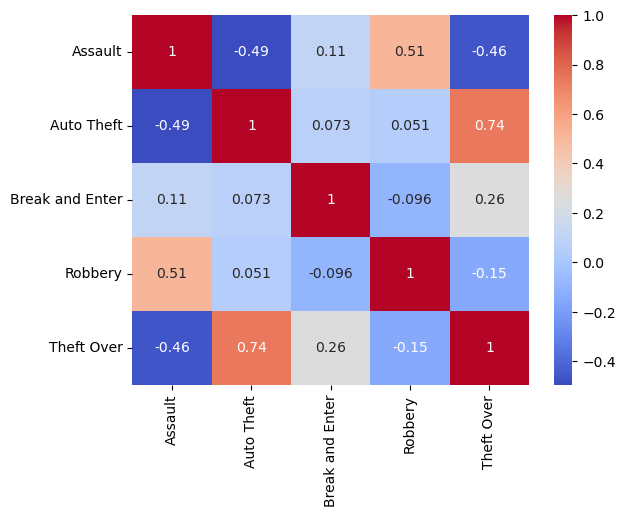

<Figure size 640x480 with 0 Axes>

In [31]:
# Calculate the correlation between the number of crimes and the number of each MCI_CATEGORY
corr = df_neighbourhood_top_10.drop('Neighbourhood', axis=1).corr()
# Plot the correlation
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
# save the figure as a png file
plt.savefig('q4.png')

